# Homework 2 #

### Due 2/12 at 11:59pm ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1 ##

### Part A

In [2]:
def f(x):
    return (x[0]-1)**2 + (2*x[1]-1)**2
def Gf(x):
    return np.array([2*(x[0]-1),4*(x[1]-1)])

xk = np.array([0,0])   # Initial point ﴾0,0﴿ 
pk = -Gf((xk[0],xk[1]))  # step direction 
# phi﴾a﴿ = f﴾x + a*p﴿ = f﴾x - a*df﴿ 
phi = lambda alpha: f((xk[0]+alpha*pk[0],  xk[1]+alpha*pk[1])) # phi = f(x + alpha * p) 

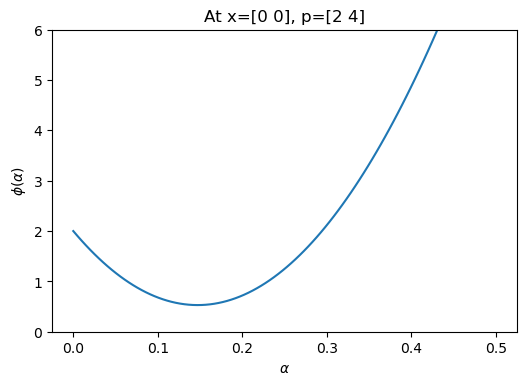

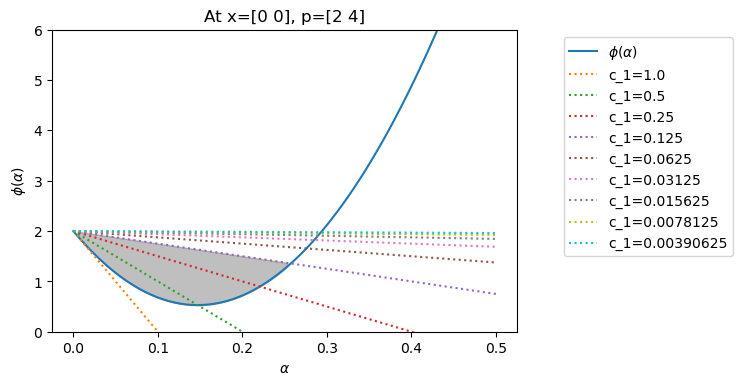

In [3]:
xx = np.linspace(0,0.5,100) 
pp = phi(xx) 
plt.figure(dpi=100) 
plt.plot(xx,pp) 
plt.xlabel(r'$\alpha$') 
plt.ylabel(r'$\phi(\alpha)$') 
plt.ylim([0,6]) 
plt.title(f'At x={xk}, p={-Gf((xk[0],xk[1]))}') 
plt.figure(dpi=100)
plt.plot(xx,pp,label=r'$\phi(\alpha)$')
for i in range(9):
    ll = phi(0)-(1/2**i)*xx*np.dot(pk,pk) # example: phi(0) - 0.5 * x * p^T p
    plt.plot(xx,ll,':',label=f'c_1={1/2**i}')
    if i == 3:
        plt.fill_between(xx, pp, ll, where=ll>pp, color='grey', alpha=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\phi(\alpha)$')
plt.ylim([0,6])
plt.title(f'At x={xk}, p={-Gf((xk[0],xk[1]))}')
plt.legend(loc=(1.1,.25))
plt.show()

### Part B

## Question 2 ##

In [4]:
# function f
f = lambda x,y: 100*(y-x**2)**2 + (1-x)**2
# gradient of f
Df = lambda x,y: np.array([(200*(y-x**2)*(-2)*x + 2*(-1)*(y-x**2)),(200*(y-x**2))])
# alpha
x,y = 1.2,1.2
alpha = lambda x,y: ((x-1)**2+4*(2*y-1)**2)/(2*(x-1)**2+32*(2*y-1)**2)

In [5]:
def WolfeI(alpha,f,x,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])-c1*alpha*np.dot(p,p)
    return LHS <= RHS

In [6]:
x0 = np.array([1.2,1.2])  # initial point
x = x0.copy()         # same initial point as before
print(f'Initial x={x}')
dx = np.array([np.inf,np.inf]) # initial large gradient so while loop runs
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 100       # Maximum number of steps to run the iteration
rho = 0.5            # parameter for backtracking algorithm
i=0                   # iteration count

while np.linalg.norm(dx)>tol and i<max_steps:
    dx = Df(x[0],x[1])
    
    # backtracking
    a = 1
    j = 0   # keep track of how many backtracking iterations
    while not WolfeI(a,f,x,-dx):
        a *= rho
        j += 1
        if i == 0:
            print(f'In iteration {i}, 1st backtrack: alpha={a}')

    # new value of x
    xnew = x - a*dx
    
    # update old value
    x = xnew
    # update iteration count
    i += 1
    print(f'In iteration {i}, alpha={a} after {j} backtracks, and newx={x}')

Initial x=[1.2 1.2]
In iteration 0, 1st backtrack: alpha=0.5
In iteration 0, 1st backtrack: alpha=0.25
In iteration 0, 1st backtrack: alpha=0.125
In iteration 0, 1st backtrack: alpha=0.0625
In iteration 0, 1st backtrack: alpha=0.03125
In iteration 0, 1st backtrack: alpha=0.015625
In iteration 0, 1st backtrack: alpha=0.0078125
In iteration 0, 1st backtrack: alpha=0.00390625
In iteration 0, 1st backtrack: alpha=0.001953125
In iteration 0, 1st backtrack: alpha=0.0009765625
In iteration 1, alpha=0.0009765625 after 10 backtracks, and newx=[1.08703125 1.246875  ]
In iteration 2, alpha=0.0009765625 after 10 backtracks, and newx=[1.11486016 1.23413319]
In iteration 3, alpha=0.0009765625 after 10 backtracks, and newx=[1.1110194  1.23584803]
In iteration 4, alpha=0.0009765625 after 10 backtracks, and newx=[1.11166631 1.2355582 ]
In iteration 5, alpha=0.00390625 after 8 backtracks, and newx=[1.11124096 1.23574866]
In iteration 6, alpha=0.00048828125 after 11 backtracks, and newx=[1.11143547 1.235

In [7]:
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 100 iterations, approximate minimum is 0.012431756272279318 at [1.11143547 1.23566153]


## Question 3 ##

### Part A ###

#### SR-1

In [8]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = 1.2,1.2

In [9]:
def approx_convergence_rate(path, minimizer, numToAvg=100, showPlot=False):
    '''Given a path defined by an iteration and a known minimizer, approximates convergence rate'''
    err = np.linalg.norm(path-np.array(minimizer),axis=1) # ||x_k-x*||=e_k
    
    # if converged in very few steps, return infinite order
    if len(err)<=3:
        return np.inf
    
    pp = np.zeros(len(err)-3)
    for i in range(len(err)-3):
        pp[i] = np.log(err[i+2]/err[i+1])/np.log(err[i+1]/err[i])
    
    if numToAvg>len(pp):
        # if not enough iterations to average, just average all
        p=np.mean(pp)
    else:
        # return mean of last few iterations
        p=np.mean(pp[-numToAvg:])
        
    return p

In [10]:
x,y = 1.2,1.2    # initial point
path_SR1 = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  
        alpha *= rho
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     # @ is mATrix multiplication
    denom = vec@yk    # computes dot product if two vectors
#     print('Denominator is ',denom)   # uncomment this to do a little inspection
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            # set limit so we don't print too much
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_SR1,[1,1],4))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### DFP

In [11]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = 1.2,1.2

In [12]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [22]:
x,y = 1.2,1.2    # initial point
path_DFP = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx   # -H * gradient
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:
        alpha *= rho
    
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k   x_{k+1} = x_k + alpha * pk
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k  
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2 # np.outer(vec, vec) = vec * vec^T

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_DFP,[1,1],5))

After 29 iterations, approximate minimum is 2.10435193906722e-20 at (1.000000000121387, 1.000000000234831)
Approximate convergence rate: 1.7959661737759103


#### BFGS

In [14]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = 1.2,1.2

In [15]:
x,y = 1.2,1.2    # initial point
path_BFGS = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_BFGS,[1,1],5))

After 20 iterations, approximate minimum is 5.132242767706394e-25 at (1.000000000000121, 1.0000000000001714)
Approximate convergence rate: 1.8077157906284431


### Part B ###

#### SR-1

In [16]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = -1.2,1

In [17]:
x,y = -1.2,1    # initial point
path_SR1 = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
skips = 0             # keep track of how many times SR1 update is skipped
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  
        alpha *= rho
                
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_SR1.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # SR1 update
    vec = sk-H@yk     # @ is mATrix multiplication
    denom = vec@yk    # computes dot product if two vectors
#     print('Denominator is ',denom)   # uncomment this to do a little inspection
    if abs(denom)>1e-8*np.linalg.norm(vec)*np.linalg.norm(yk):
        # only update if denominator doesn't vanish
        H += np.outer(vec,vec)/denom    
    else:
        # if denominator vanishes, alert the user
        skips += 1
        if skips<50:
            # set limit so we don't print too much
            print('Skipping SR1 update in iteration',i,'. Denominator is ',denom)
        elif skips==50:
            print('Reached maximum number of skips; breaking loop now.')
            break

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_SR1=np.array(path_SR1)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_SR1,[1,1],4))

After 50 iterations, approximate minimum is 7.56074873187112e-20 at (1.0000000002625014, 1.000000000516817)
Approximate convergence rate: 2.1261644261617514


#### DFP

In [18]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = -1.2,1

In [19]:
x,y = -1.2,1    # initial point
path_DFP = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx   # -H * gradient
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:
        alpha *= rho
    
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_DFP.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k   x_{k+1} = x_k + alpha * pk
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k  
    
    # DFP update
    vec = H@yk
    denom1 = yk@sk
    denom2 = yk@vec
    H += np.outer(sk,sk)/denom1 - np.outer(vec,vec)/denom2 # np.outer(vec, vec) = vec * vec^T

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_DFP=np.array(path_DFP)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_DFP,[1,1],5))

After 46 iterations, approximate minimum is 2.2011203733880926e-26 at (0.9999999999998633, 0.9999999999997209)
Approximate convergence rate: 1.5864185237066966


#### BFGS

In [20]:
a,b = 1,100    
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
D2f = lambda x,y: np.array([[2-4*b*y+12*b*x**2,-4*b*x],
                            [-4*b*x,2*b]])
x0,y0 = -1.2,1

In [21]:
x,y = -1.2,1    # initial point
path_BFGS = [[x,y]]
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
i=0                   # iteration count
rho = 0.75            # rho for backtracking
H = np.eye(2)         # initial inverse Hessian is identity
dx = Df(x,y)          # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -H@dx
    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5:  # lower limit to prevent small steps, similar to Wolfe II
        alpha *= rho
        
    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    path_BFGS.append([xnew,ynew])
    
    # secant variables
    sk = alpha*pk         # x_{k+1}-x_k
    yk = Df(xnew,ynew)-dx # Df_{k+1}-Df_k
    
    # BFGS update
    vec = H@yk
    denom = yk@sk
    H += (denom+vec@yk)*np.outer(sk,sk)/denom**2 - (np.outer(vec,sk)+np.outer(sk,vec))/denom

    x,y = xnew,ynew
    dx = Df(x,y)
    i += 1

path_BFGS=np.array(path_BFGS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')
print('Approximate convergence rate:',approx_convergence_rate(path_BFGS,[1,1],5))

After 42 iterations, approximate minimum is 1.55914754025609e-21 at (1.0000000000393046, 1.000000000078231)
Approximate convergence rate: 1.242083715878251
